In [ ]:
import torch 
import torch.nn as nn
import numpy as np
import pandas as pd
import yfinance as yf

In [ ]:
tsla = yf.Ticker("tsla")

tsla_hist = tsla.history(period='5y', interval='1d', start='2020-01-01')
tsla_hist

In [ ]:
tsla_hist.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

In [ ]:
tsla_hist.index =pd.to_numeric(tsla_hist.index)
tsla_hist.index = tsla_hist.index/(max(tsla_hist.index))

In [10]:
for col in tsla_hist.columns:
    tsla_hist[col] = tsla_hist[col]/max(tsla_hist[col])

In [11]:
tsla_hist

,Open,High,Low,Close,Volume
Date,,,,,
0.902102,0.059466,0.058774,0.061450,0.059776,0.156421
0.902152,0.061708,0.061953,0.063666,0.061547,0.291744
0.902300,0.061703,0.061620,0.064115,0.062732,0.166282
0.902349,0.064635,0.064359,0.066062,0.065166,0.293444
0.902399,0.066358,0.068024,0.068229,0.068373,0.511075
...,...,...,...,...,...
0.999802,0.721790,0.712367,0.728574,0.714146,0.089569
0.999852,0.728304,0.727474,0.749798,0.717438,0.108660
0.999901,0.725152,0.707414,0.715460,0.691973,0.108209


In [13]:
class MLP(nn.Module):
    def __init__(self, input_features, hidden_features, output_features):
        super().__init__()
        self.l1 = nn.Sequential(
            nn.Linear(input_features, hidden_features),
            nn.ReLU()
        )
        self.l2 = nn.Sequential(
            nn.Linear(hidden_features, output_features),
            nn.Relu()
        )

    def forward(self, x):
        x = self.l1(x)
        x = self.l2(x)
        return x

In [14]:
X = tsla_hist.drop(columns=['Close'])
y = tsla_hist['Close']

In [17]:
X['Date'] = X.index

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

pca.fit(X, y)

PCA(n_components=5)

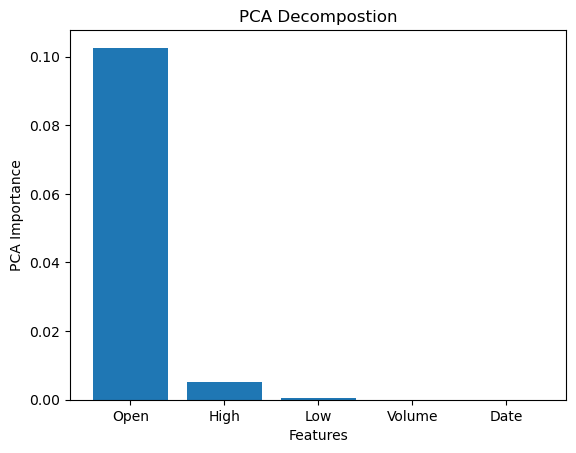

In [23]:
import matplotlib.pyplot as plt

plt.bar(X.columns, pca.explained_variance_)
plt.xlabel('Features')
plt.ylabel('PCA Importance')
plt.title("PCA Decompostion")
plt.show()